# Graident decent 梯度下降

## Batch为全体数据
梯度下降的实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

### 建立模型

依然使用线性模型


In [2]:
# 随机在指定区间选择一个数字用来计算其梯度，此时的W是全局变量
# w = random.uniform(0.0,4.1)
w = 3.1
print('w = ',w)

def forward(x):
    return x*w

w =  3.1


### Loss函数，并计算出MSE

> ！！注：MSE是**全部训练数据**Loss的平均值，下面会有随机梯度下降的例子

In [10]:
# 定义loss函数，计算出对应w值其的error
# 其cost是每轮

def mse(xs, ys):
    cost = 0
    for x, y in zip(xs, ys):
        y_perd = forward(x)
        cost += (y_perd - y)**2
    return cost/len(xs)

### Optimization
运用梯度下降法进行优化

进一步解释就是，不同的w是会有不同的MSE，可以根据随机选的w来计算其所在的MSE上的梯度


In [11]:
# 计算w在对应点的梯度（公式涉及相关数学知识，略；并且是平均的梯度）
def gradient(xs, ys):
    grad = 0
    for x, y in zip(xs, ys):
        grad += 2*x*(x*w-y)
    return grad/len(xs)

### Main 函数

In [ ]:
# 建立两个数组储存相关数据
loss_list = []
epoch_list = []

# 进行100次更新，即100次训练
print('predict before training', 4, forward(4))
for epoch in range(100):
    epoch_list.append(epoch)
    
    # 每一次循环将全部的数据录入
    mse_val = mse(x_data, y_data)
    loss_list.append(mse_val)
    
    grad_val = gradient(x_data, y_data)
    
    # 注意！！ 这里的0.01(learning rate)是 hyperparameter
    # 有时候不能取太大，训练多次loss可能会上升
    # 根据定义更新w的数值
    w -= 0.01* grad_val

    print('Epoch:', epoch, ' w=:', w, ' loss=', mse_val)

print('predict after training', 4, forward(4))

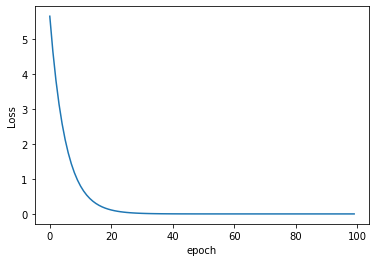

In [13]:
plt.plot(epoch_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()


## 随机梯度下降，设置Batch size

每次用随机的 **一个样本！！** 的的loss进行更新

但不能进行并行计算，时间的复杂度比较高

因此可以设置对应的 batch size 进行训练，进行折中


In [3]:
def loss(x,y):
    y_perd = forward(x)
    
    # 只用一组的loss就进行参数的更新
    return (y_perd - y)**2

def gradient_ar(x, y):
    return 2*x*(x*w - y)

In [ ]:
# 建立两个数组储存相关数据
loss_list = []
epoch_list = []
num = 0

# 进行100次更新，即100次训练 
print('predict before training', 4, forward(4))
for epoch in range(100):
    for x, y in zip(x_data, y_data):
        epoch_list.append(num)
        num += 1
        grad = gradient_ar(x, y)
        
        # 注！！每一次更新需要用到上次的W值
        w = w - 0.01*grad
        print('\t grad', x, y, grad)
        
        l = loss(x, y)
        loss_list.append(l)
        
    print('progess', epoch, ' w=', w, 'loss', l)
print('predict after training', 4, forward(4))

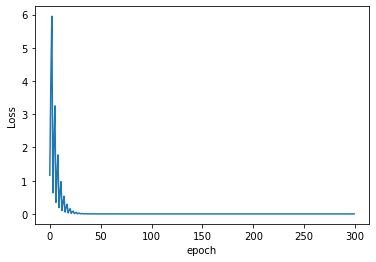

In [5]:
plt.plot(epoch_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()